In [1]:
#importing libraries
import pandas as pd
import numpy as np
#For plotting
import matplotlib.pyplot as plt
from shapely.geometry import LineString
import csv

In [2]:
pip install plotly

In [3]:
!pip install plotly dash jupyter-dash

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 74.4 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [4]:
#importing libraries
import plotly.graph_objects as go
from math import sqrt
from dash import Dash, dcc, html, Input, Output
from jupyter_dash import JupyterDash

In [5]:
#Reading the dataset
input_file_name=input("Enter the input file path: ")
data1=pd.read_csv(input_file_name,names=['ppm','Intensities'])
data1.reset_index(drop=True, inplace=True)
data1

Enter the input file path: /content/20mM.csv


,ppm,Intensities
0,-5.000000,0.993814
1,-4.857143,0.989175
2,-4.714286,0.987113
3,-4.571429,0.989691
4,-4.428571,0.986082
...,...,...
101,9.428571,0.989691
102,9.571429,0.993004
103,9.714286,0.994035
104,9.857143,0.995214


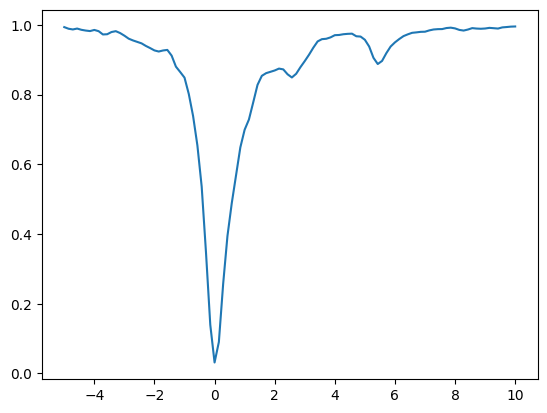

In [6]:
plt.plot(data1["ppm"],data1["Intensities"])

In [7]:
#defing the necessary functions needed for three pool curve fitting

def peak(data,Intensity):
  I=data[Intensity]
  ppm=data["ppm"]
  positions=[]
  indices=[]
  Inten={}
  for i in range(1,len(I)-1):
    if I[i-1]>=I[i] and I[i]<=I[i+1]:
      positions+=[data["ppm"][i]]
      indices+=[i]
      Inten[data["ppm"][i]]=I[i]
  for i in range(2, len(I)-2):
    if I[i-2]>=I[i] and I[i]<=I[i+2]:
      if data["ppm"][i] not in positions:
        positions+=[data["ppm"][i]]
        indices+=[i]
        Inten[data["ppm"][i]]=I[i]
  positions.sort()
  indices.sort()
  return positions,indices,Inten

def data_plot(data,I):
  positions=peak(data,I)[0]
  fig = go.Figure()
  fig.add_trace(go.Scatter(x=data["ppm"], y=data[I], mode='lines+markers'))
  for i in range(len(positions)):
    lim_0=0
    lim_1=1.1
    l_y=[]
    l_x=[]
    while lim_0<=lim_1:
      l_y+=[lim_0]
      l_x+=[positions[i]]
      lim_0+=0.05
    #print(l_y)
    fig.add_trace(go.Scatter(x=l_x, y=l_y, mode='lines+markers',name=str(i)))
  fig.show()
  return positions

def interactive_plot(data,peak_positions,I):
  x=data["ppm"]
  y=data[I]
  fig = go.Figure()
  fig.add_trace(go.Scatter(x=x, y=y, mode='lines+markers'))
  fig.add_shape(
      type="line",
      x0=peak_positions[0],
      x1=peak_positions[0],
      y0=min(y),
      y1=max(y),
      line=dict(color="Green", width=2, dash="dash"),
      name='Vertical Line')

  fig.add_shape(
      type="line",
      x0=peak_positions[1],
      x1=peak_positions[1],
      y0=min(y),
      y1=max(y),
      line=dict(color="Green", width=2, dash="dash"),
      name='Vertical Line')



  fig.update_layout(
      title='Intensities vs offset graph',
      xaxis_title='offset',
      yaxis_title='Intensities')

  fig.show()

In [8]:
#function for getting the tracer (indexes) for the peaks
data_plot_1=data_plot(data1,"Intensities")

In [9]:
#defining the three peak positions (x1,x2 and x3)/ Offset values
p1=int(input("enter the tracer for x1: "))
p2=int(input("enter the tracer for x2: "))
x1=peak(data1,"Intensities")[0][p1]
x2=peak(data1,"Intensities")[0][p2]
print(x1,x2)

enter the tracer for x1: 6
enter the tracer for x2: 9
0.0 2.571428571


In [10]:
peak_positions_1=[data_plot_1[p1],data_plot_1[p2]]
peak_positions_1

[0.0, 2.571428571]

In [11]:
#plot with the marked peaks
interactive_plot(data1,peak_positions_1,"Intensities")

In [12]:
#Calculating the amplitdes for the peaks
avg_=[]
for i in range(len(data1["Intensities"])-1,len(data1["Intensities"])-11,-1):
  avg_+=[data1["Intensities"][i]]

avg2=np.average(avg_)
avg2

dic=peak(data1,"Intensities")[2]
A=[]
for i in peak_positions_1:

  A+=[-dic[i]+avg2]
A

[0.9602701879, 0.14252577290000001]

In [13]:
#following code only works once, restartsession whenever you need to use it again
#This is the code that needed for calculating the fwhm (Full Width of Half Maxima)
#Click on 2 points in the images where a query for calculating the distance between 2 points is present (Chose any of the last two images)
#click on any points for which you need to calculate the distance between them

data64=data1
app = JupyterDash(__name__)
i1=p1
i2=p2
I="Intensities"
x=data64["ppm"]
y=data64["Intensities"]
i=min(x)
j=max(x)
x_coord=[]
base_line=[]
y_coord1=[]
y_coord2=[]
while i<=j:
  x_coord+=[i]
  base_line+=[y.iloc[len(y)-1]]
  y_coord1+=[((y.iloc[len(y)-1])+data64[I][peak(data64,I)[1][i1]])/2]
  y_coord2+=[((y.iloc[len(y)-1])+data64[I][peak(data64,I)[1][i2]])/2]
  i+=(1/50)

k=min(y)
peak_1x=[]
peak_2x=[]
peak_y=[]
while k<=1.05:
  peak_y+=[k]
  peak_1x+=[data64["ppm"][peak(data64,I)[1][i1]]]
  peak_2x+=[data64["ppm"][peak(data64,I)[1][i2]]]
  k+=(1/200)

fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y, mode='lines+markers'))
fig.add_trace(go.Scatter(x=x_coord, y=base_line, mode='lines+markers'))
fig.add_trace(go.Scatter(x=x_coord, y=y_coord1, mode='lines+markers'))
fig.add_trace(go.Scatter(x=x_coord, y=y_coord2, mode='lines+markers'))
fig.add_trace(go.Scatter(x=peak_1x, y=peak_y, mode='lines+markers'))
fig.add_trace(go.Scatter(x=peak_2x, y=peak_y, mode='lines+markers'))
fig.update_layout(title='Intensities vs offset graph',xaxis_title='ppm',yaxis_title='Intensities')
fig.show()

# Define the layout of the app
app.layout = html.Div([
    dcc.Graph(id='scatter-plot', figure=fig),
    html.Div(id='output')
])

# Initialize a list to store clicked points
clicked_points = []

@app.callback(
    Output('output', 'children'),
    Input('scatter-plot', 'clickData')
)
def display_click_data(clickData):
    global clicked_points
    if clickData:
        point = clickData['points'][0]
        clicked_points.append((point['x'], point['y']))
        if len(clicked_points) == 2:
            x0, y0 = clicked_points[0]
            x1, y1 = clicked_points[1]
            distance = sqrt((x1 - x0) ** 2 + (y1 - y0) ** 2)
            clicked_points = []  # Reset after calculating the distance
            return f'Distance between points: {distance:.2f}'
    return "Click on two points to calculate the distance."

# Run the Dash app in Colab
app.run_server(mode='inline',port=8050)

/usr/local/lib/python3.10/dist-packages/dash/dash.py:556: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
R1=float(input("Enter fwhm1: "))
R2=float(input("Enter fwhm2: "))

Enter fwhm1: 1.04
Enter fwhm2: 1.26


In [15]:
def lorentzian(x,A,r,x1):
  L= (A*r)/(((x-x1)**2+r**2)*np.pi)
  return L

In [16]:
def bound(lower,upper,step):
  l=[]
  while lower<=upper:
    l+=[lower]
    lower+=step
  return l

def boundaries(A,r):
  r1=r/2
  B_A=bound(A-1.1,A+1.1,1/20)
  B_r=bound(r1-0.05,r1+0.05,1/40)
  return B_A,B_r

def error(data,A,r,off):
  x=data["ppm"]
  y=data["Intensities"]
  y_fit=lorentzian(x,A,r,off)
  error=0
  for i in range(len(x)):
    if x[i] == off:
      print(A,",",r,",",off,"   ",y_fit[i],"   ",y[i],"   ",(avg2-y_fit[i])-y[i])
      error+=((avg2-y_fit[i])-y[i])**2
  error1=np.sum(((avg2-y_fit)-(y))**2)
  return error,error1

def para(data,A,r,pe):
  x=data["ppm"]
  y=data["Intensities"]
  liste1=[]
  liste2=[]
  e={}
  val={}
  for i in range(len(A)):
    for j in range(len(r)):
      err=error(data,A[i],r[j],pe)
      liste1+=[err[0]]
      liste2+=[err[1]]
      e[err[0]]=err[1]
      val[err[1]]=[A[i],r[j],pe]
      #print(i,j,err[0],err[1],A[i],"\n")

  liste1.sort()
  listf1=liste1[0:10]
  listf2=[]
  for i in listf1:
    listf2+=[e[i]]
  mini=min(listf2)
  print(val[mini])
  for i in listf1:
    if e[i]==mini:
      print(i,mini)
  return val[mini]

In [17]:
print(A,R1,R2,x1,x2)

[0.9602701879, 0.14252577290000001] 1.04 1.26 0.0 2.571428571


In [18]:
b=boundaries(A[0],R1)
p=para(data64,b[0],b[1],x1)
p

-0.13972981210000013 , 0.47000000000000003 , 0.0     -0.09463272465113508     0.031592846     1.054902912551135
-0.13972981210000013 , 0.49500000000000005 , 0.0     -0.08985329411319899     0.031592846     1.050123482013199
-0.13972981210000013 , 0.52 , 0.0     -0.08553342420391055     0.031592846     1.0458036121039107
-0.13972981210000013 , 0.545 , 0.0     -0.08160987263492385     0.031592846     1.0418800605349239
-0.13972981210000013 , 0.5700000000000001 , 0.0     -0.07803049225619912     0.031592846     1.0383006801561991
-0.08972981210000013 , 0.47000000000000003 , 0.0     -0.060769970801795664     0.031592846     1.0210401587017957
-0.08972981210000013 , 0.49500000000000005 , 0.0     -0.057700780357260534     0.031592846     1.0179709682572606
-0.08972981210000013 , 0.52 , 0.0     -0.054926704378546076     0.031592846     1.0151968922785461
-0.08972981210000013 , 0.545 , 0.0     -0.052407130783199925     0.031592846     1.0126773186832
-0.08972981210000013 , 0.5700000000000001 ,

[1.6102701879000008, 0.545, 0.0]

In [19]:
x=data64["ppm"]
y=data64["Intensities"]
y_fit1=lorentzian(data64["ppm"],p[0],p[1],p[2])
fig=go.Figure()
fig.add_trace(go.Scatter(x=x, y=y, mode='markers',name="Data plot"))
#fig.add_trace(go.Scatter(x=x, y=y_fit, mode='markers',name="Data plot"))
fig.update_layout(title='Intensities vs offset graph',xaxis_title='offset',yaxis_title='Intensities')
fig.add_trace(go.Scatter(x=x, y=y[len(y)-1]-y_fit1, mode='lines',line_shape="spline",name="Fitted plot"))
fig.show()

In [20]:
b1=boundaries(A[1],R2)
p1=para(data64,b1[0],b1[1],x2)
p1

-0.9574742271000001 , 0.58 , 2.571428571     -0.5254715728484723     0.849337261     0.6679973457484724
-0.9574742271000001 , 0.605 , 2.571428571     -0.5037578714910975     0.849337261     0.6462836443910974
-0.9574742271000001 , 0.63 , 2.571428571     -0.4837674797652603     0.849337261     0.6262932526652604
-0.9574742271000001 , 0.655 , 2.571428571     -0.465303072140632     0.849337261     0.6078288450406321
-0.9574742271000001 , 0.68 , 2.571428571     -0.4481963415472263     0.849337261     0.5907221144472264
-0.9074742271 , 0.58 , 2.571428571     -0.49803106541883524     0.849337261     0.6405568383188353
-0.9074742271 , 0.605 , 2.571428571     -0.4774512693271479     0.849337261     0.6199770422271479
-0.9074742271 , 0.63 , 2.571428571     -0.4585047903855943     0.849337261     0.6010305632855942
-0.9074742271 , 0.655 , 2.571428571     -0.4410046075464495     0.849337261     0.5835303804464494
-0.9074742271 , 0.68 , 2.571428571     -0.4247912028572417     0.849337261     0.567

[0.34252577290000025, 0.68, 2.571428571]

In [21]:
y_fit2=lorentzian(data64["ppm"],p1[0],p1[1],p1[2])
fig=go.Figure()
fig.add_trace(go.Scatter(x=x, y=y, mode='markers',name="Data plot"))
#fig.add_trace(go.Scatter(x=x, y=y_fit, mode='markers',name="Data plot"))
fig.update_layout(title='Intensities vs offset graph',xaxis_title='offset',yaxis_title='Intensities')
fig.add_trace(go.Scatter(x=x, y=y[len(y)-1]-y_fit2, mode='lines',line_shape="spline",name="Fitted plot"))
fig.show()

In [22]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=x, y=data64["Intensities"], mode='markers',name="Data plot"))
#fig.add_trace(go.Scatter(x=x, y=y_fit, mode='markers',name="Data plot"))
fig.update_layout(title='Intensities vs offset graph',xaxis_title='offset',yaxis_title='Intensities')
#ig.add_trace(go.Scatter(x=x, y=y[len(y)-1]-y_fit, mode='lines',line_shape="spline",name="Fitted plot"))
fig.add_trace(go.Scatter(x=x, y=y[len(y)-1]-y_fit1, mode='lines',line_shape="spline",name="Fitted plot"))
fig.add_trace(go.Scatter(x=x, y=y[len(y)-1]-y_fit2, mode='lines',line_shape="spline",name="Fitted plot"))
fig.show()

In [23]:
#defining the three pool lorentzian function
def lorentz(x,A1,A2,r1,r2,x1,x2):
  L= (A1*r1)/(((x-x1)**2+r1**2)*np.pi)  +  (A2*r2)/(((x-x2)**2+r2**2)*np.pi)
  return L

In [24]:
def bound(lower,upper,step):
  l=[]
  while lower<=upper:
    l+=[lower]
    lower+=step
  return l

def boundaries(A1,A2,r1,r2):
  B_A1=bound(A1-0.1,A1+0.1,1/40)
  B_A2=bound(A2-0.1,A2+0.1,1/40)
  B_r1=bound(r1-0.05,r1+0.05,1/40)
  B_r2=bound(r2-0.05,r2+0.05,1/40)
  return B_A1,B_A2,B_r1,B_r2

def error(data,A1,A2,r1,r2,x1,x2):
  x=data["ppm"]
  y=data["Intensities"]
  y_fit=lorentz(x,A1,A2,r1,r2,x1,x2)
  error1=np.sum(((avg2-y_fit)-(y))**2)
  error=0
  loc=[x1,x2]
  for i in range(len(x)):
    if x[i] in loc:
      error+=((avg2-y_fit[i])-y[i])**2
  return error,error1

def para(data,A1,A2,r1,r2,x1,x2):
  liste1=[]
  liste2=[]
  list2=[]
  e={}
  val={}
  x=data["ppm"]
  y=data["Intensities"]
  for i in range(len(A1)):
    for j in range(len(A2)):
      for l in range(len(r1)):
        for m in range(len(r2)):
          err=error(data,A1[i],A2[j],r1[l],r2[m],x1,x2)
          liste1+=[err[0]]
          liste2+=[err[1]]
          e[err[0]]=err[1]
          val[err[1]]=[A1[i],A2[j],r1[l],r2[m]]
          print(i,j,l,m,"   ",err[0]," ",err[1])

  liste1.sort()
  listf1=liste1[0:10]
  listf2=[]
  for i in listf1:
    listf2+=[e[i]]
  mini=min(listf2)
  print(val[mini])
  for i in listf1:
    if e[i]==mini:
      print(i,mini)
  return val[mini]

In [25]:
print(p,p1)

[1.6102701879000008, 0.545, 0.0] [0.34252577290000025, 0.68, 2.571428571]


In [26]:
b=boundaries(p[0],p1[0],p[1],p1[1])
b

([1.5102701879000007,
  1.5352701879000006,
  1.5602701879000005,
  1.5852701879000004,
  1.6102701879000003,
  1.6352701879000002,
  1.6602701879000001,
  1.6852701879,
  1.7102701879],
 [0.24252577290000024,
  0.26752577290000024,
  0.29252577290000026,
  0.3175257729000003,
  0.3425257729000003,
  0.3675257729000003,
  0.39252577290000035,
  0.41752577290000037],
 [0.49500000000000005, 0.52, 0.545, 0.5700000000000001, 0.5950000000000001],
 [0.63, 0.655, 0.68, 0.7050000000000001, 0.7300000000000001])

In [27]:
p3=para(data64,b[0],b[1],b[2],b[3],p[2],p1[2])

0 0 0 0     0.0005350512498445261   0.12143608496083101
0 0 0 1     0.0004280073979591779   0.12038095046218175
0 0 0 2     0.0003685052980702292   0.11950873685230176
0 0 0 3     0.000347472172206632   0.11879566553518638
0 0 0 4     0.00035760712072887684   0.11822156939404457
0 0 1 0     0.0010986527651810662   0.11617325356143082
0 0 1 1     0.0009538327056706078   0.11503057749794637
0 0 1 2     0.0008579955017250993   0.11407112946657193
0 0 1 3     0.0008019571176427248   0.11327120211427347
0 0 1 4     0.0007783211280691995   0.11261069640308409
0 0 2 0     0.005398209198670654   0.12186830670511392
0 0 2 1     0.00521786531225514   0.12063839640181205
0 0 2 2     0.005087902388813148   0.1195920924931473
0 0 2 3     0.004999025851067116   0.11870575570496929
0 0 2 4     0.004943744320932534   0.11795935189741766
0 0 3 0     0.01246717911891229   0.13639915092015162
0 0 3 1     0.012253296566075825   0.1350823849578806
0 0 3 2     0.012091153601788574   0.13394967180787637
0 0 

In [28]:
p3

[1.5602701879000005, 0.24252577290000024, 0.52, 0.7300000000000001]

In [29]:
y_fit_f=lorentz(x,p3[0],p3[1],p3[2],p3[3],x1,x2)

In [30]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=x, y=y, mode='markers',name="Data plot"))
#fig.add_trace(go.Scatter(x=x, y=y_fit, mode='markers',name="Data plot"))
fig.update_layout(title='Intensities vs offset graph',xaxis_title='offset',yaxis_title='Intensities')
fig.add_trace(go.Scatter(x=x, y=y[len(y)-1]-y_fit_f, mode='lines',line_shape="spline",name="Fitted plot"))
fig.show()

In [31]:
fit=[]
for i in range(len(y)):
  fit+=[y[len(y)-1]-y_fit_f[i]]
fit1=y_fit_f

In [32]:
#function for getting the csv file with the fitted values of the raw data
filename = "final_fitted_data.csv"


fields = ["offset","Intensities","Lorentzian"]

rows = []
for i in range(len(fit)):
  rows+=[[data64["ppm"][i],fit[i],fit1[i]]]

with open(filename, 'w') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(fields)
    csvwriter.writerows(rows)

In [33]:
data_pablo=pd.read_csv("final_fitted_data.csv")

In [34]:
data_pablo

,offset,Intensities,Lorentzian
0,-5.000000,0.984462,0.011194
1,-4.857143,0.983821,0.011834
2,-4.714286,0.983124,0.012532
3,-4.571429,0.982362,0.013293
4,-4.428571,0.981529,0.014127
...,...,...,...
101,9.428571,0.991574,0.004081
102,9.571429,0.991707,0.003948
103,9.714286,0.991833,0.003822
104,9.857143,0.991954,0.003702


In [35]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=data_pablo["offset"], y=data64["Intensities"], mode='markers',name="Input Data plot"))
fig.add_trace(go.Scatter(x=data_pablo["offset"], y=data_pablo["Lorentzian"], mode='markers+lines',name="Lorentzian"))
fig.update_layout(title='Intensities vs offset graph',xaxis_title='offset',yaxis_title='Intensities')
fig.add_trace(go.Scatter(x=data_pablo["offset"], y=data_pablo["Intensities"], mode='lines',line_shape="spline",name="Fitted plot"))
fig.show()